In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

#wine 데이터 확인 
wine_load = load_wine()
print('load_wine으로 불러온 변수 타입 : ',type(wine_load)) 
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine.info()

load_wine으로 불러온 변수 타입 :  <class 'sklearn.utils.Bunch'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline  

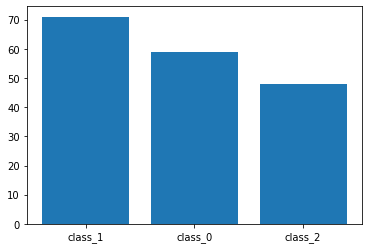

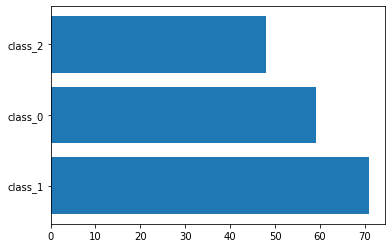

In [20]:
#범주형 변수인 wine['Class']로 막대그래프 그림
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0',1:'class_1',2:'class_2'})

#갯수 확인 
wine_type = wine['Class'].value_counts()
wine_type

#막대그래프 그리기
#'Rectangle' object has no property 'aglign'
plt.bar(wine_type.index, wine_type.values, width = 0.8, 
          bottom = None)
plt.show()

#수평 막대그래프
plt.barh(wine_type.index, wine_type.values, height = 0.8, left = None )
plt.show()

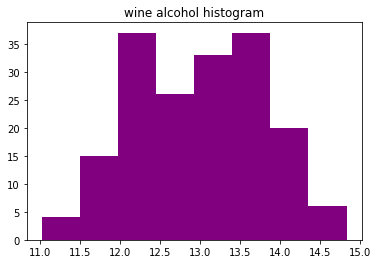

In [4]:
plt.title('wine alcohol histogram')
plt.hist('alcohol', bins = 8, range =(wine['alcohol'].min(),wine['alcohol'].max()), color = 'purple', data = wine)
plt.show()

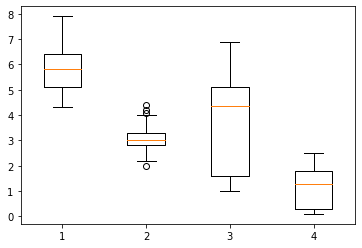

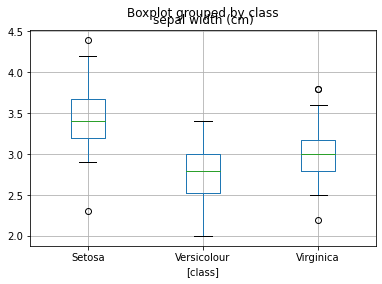

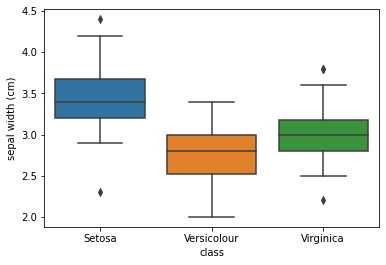

In [16]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
loaded_iris = load_iris() # print(type(iris)) : <class 'sklearn.utils.Bunch'> 
iris = pd.DataFrame(loaded_iris.data, columns = loaded_iris.feature_names)
#iris.target은 sklearn.utils.Bunch.target 함수로 분류 결과를 나타냄. pandas Series로 리턴 
iris['class'] = loaded_iris.target
iris['class'] = iris['class'].map({0:'Setosa',1:'Versicolour',2:'Virginica'})

#pyplot으로 그린 boxplot
#class는 문자열 변수로 치환하였으므로 박스플롯으로 표현 불가하여 제거하고 나머지 변수를 그림
plt.boxplot(iris.drop(columns='class'))
plt.show()
#class 분류에 따른 sepal width를 boxplot으로 표현
iris[['sepal width (cm)','class']].boxplot(by='class')
plt.show()

#sns로 그린 boxplot
sns.boxplot(x="class",y="sepal width (cm)", data =iris)
plt.show()

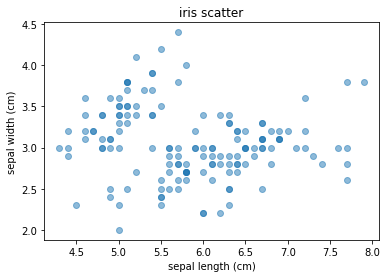

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

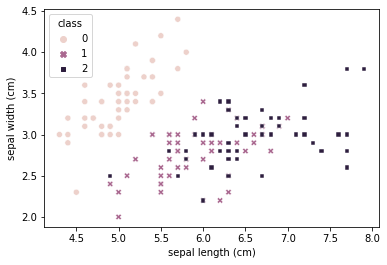

In [20]:
#Scatter Plot
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

loaded_iris = load_iris()
iris = pd.DataFrame(loaded_iris.data, columns = loaded_iris.feature_names)
iris['class'] = loaded_iris.target
iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Verginica'})

#pyplot 산점도
plt.title('iris scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(x=iris['sepal length (cm)'], y = iris['sepal width (cm)'], alpha = 0.5)
plt.show()

#seaborn 산점도
import seaborn as sns
sns.scatterplot(x='sepal length (cm)', y = 'sepal width (cm)'
                , data=iris, hue='class',style='class')

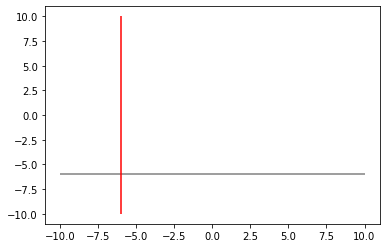

In [23]:
#수평선 수직선 그래프
plt.hlines(-6,-10,10,color='grey')
plt.vlines(-6,-10,10,color='red')

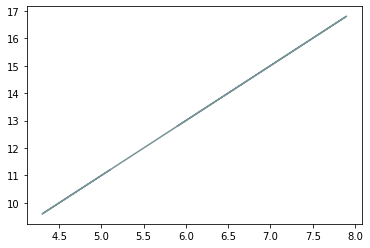

In [24]:
#함수식 그래프
#2x+1의 그래프를 그림 
def linear_func(x) : 
    return 2*x + 1

X = iris['sepal length (cm)']
plt.plot(X,linear_func(X),c='#789395')
plt.show()

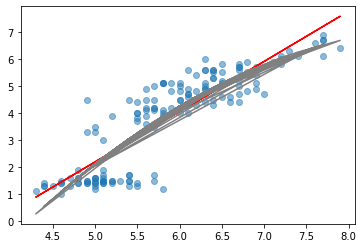

In [26]:
#회귀선 그래프(numpy)
import numpy as np 
X,Y = iris['sepal length (cm)'], iris['petal length (cm)']
#1차원 최소제곱 다항식 생성
b1, b0 = np.polyfit(X,Y,1)
plt.scatter(x=X, y=Y,alpha = 0.5)
#1차선 그래프
plt.plot(X,b1*X+b0, color='red')

#2차선 그래프
#차원 최소제곱 다항식 생성, 결과값은 차수개수 +1개가 출력, 높은 차수의 계수부터 출력
#차수개수가 2개이니 3개의 결과값이 생성되고, x**2의 계수부터 출력
c2, c1, c0 = np.polyfit(X,Y,2)
plt.plot(X,c0+c1*X+c2*X**2, color='grey' )
plt.show()


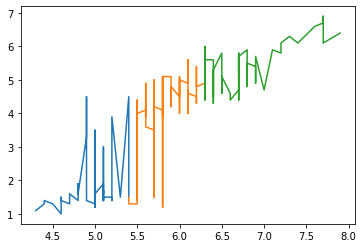

In [75]:
#꺽은선 그래프
iris2 = pd.DataFrame(load_iris().data, columns = load_iris().feature_names).sort_values(by = 'sepal length (cm)')
iris2['class'] = load_iris().target

#카테고리에 따라 분리된 그래프 그리기 
plt.plot('sepal length (cm)','petal length (cm)'
         , data=iris2.loc[iris2['class']==0])
plt.plot('sepal length (cm)','petal length (cm)'
         , data=iris2.loc[iris2['class']==1])
plt.plot('sepal length (cm)','petal length (cm)'
         , data=iris2.loc[iris2['class']==2])
plt.show()


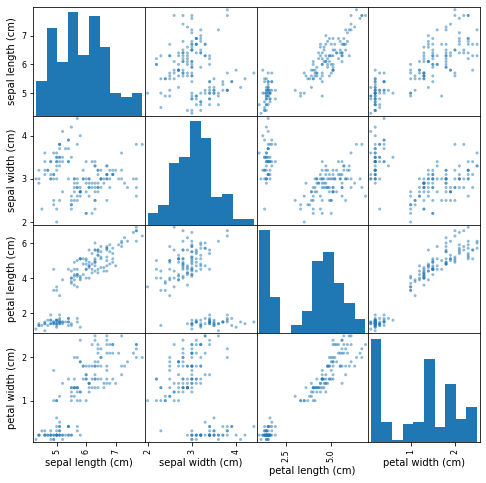

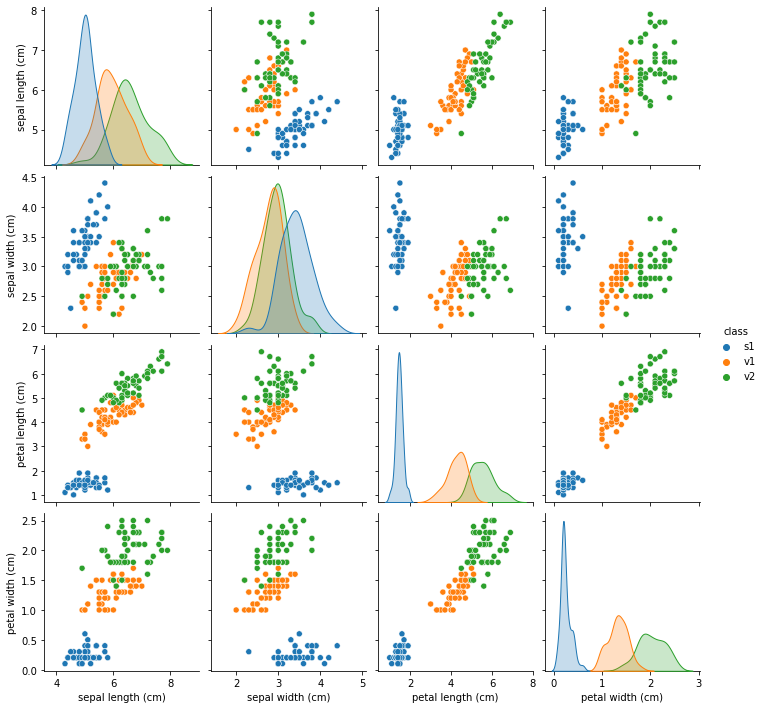

In [78]:
#산점도 행렬
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class']=load_iris().target
iris['class']=iris['class'].map({0:'s1',1:'v1',2:'v2'})

#pyplot으로 산점도 행렬 그리기
scatter_matrix(iris,alpha=0.5, figsize = (8,8),diagonal='hist')
plt.show()

#seaborn으로 산점도 행렬 그리기 
import seaborn as sns
sns.pairplot(iris,diag_kind='auto',hue='class')
plt.show()

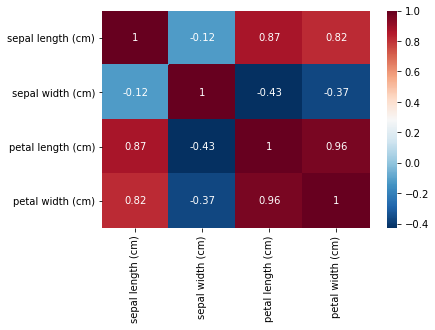

In [79]:
#상관계수 행렬 그래프
#method = {pearson, kendall, spearman}
iris_corr = iris.drop(columns='class').corr(method='pearson')
sns.heatmap(iris_corr,xticklabels = iris_corr.columns
            , yticklabels = iris_corr.columns
            , cmap='RdBu_r', annot=True)
plt.show()

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
import pandas_profiling

iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names )
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'S1',1:' V1',2:'V2'})

iris.profile_report()